In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://www.booking.com/searchresults.html?ss=India&ssne=India&ssne_untouched=India&label=gen173nr-10CAEoggI46AdIM1gEaGyIAQGYATO4ARfIAQzYAQPoAQH4AQGIAgGoAgG4Av7husUGwAIB0gIkYzE5NTAyY2EtNTBkZC00ZTFlLWI1YTctZTBlZmZiNmM4NjZj2AIB4AIB&aid=304142&lang=en-us&sb=1&src_elem=sb&src=searchresults&dest_id=98&dest_type=country&ac_position=1&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=8df848e5f2be1050&ac_meta=GhA4ZGY4NDhlNWYyYmUxMDUwIAEoATICZW46BUluZGlhQABKAFAA&checkin=2025-09-01&checkout=2025-09-02&group_adults=1&no_rooms=1&group_children=0"

In [3]:
headers ={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

In [4]:
response=requests.get(url,headers=headers)

In [5]:
response.status_code

200

In [6]:
webpage=response.text

In [7]:
soup = BeautifulSoup(webpage,"html.parser")

In [8]:
all_containers=soup.find_all("div",class_="aa97d6032f")

In [9]:
#print(soup.prettify())

In [10]:
Hotel_Name_list=[]
Location_list=[]
Price_list=[]
Star_Ratings_list=[]
Review_score_list=[]
Room_Type_list=[]
Review_list=[]
Free_WIFI_list=[]
Booking_Features_list=[]

for offset in range(0,60000,25):
    new_url = url.format(offset)
    response = requests.get(new_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    all_containers = soup.find_all("div", class_="aa97d6032f")
    
    for container in all_containers:
        Hotel_Name=container.find("div",class_="b87c397a13 a3e0b4ffd1").text
        Location=container.find("span",class_="d823fbbeed f9b3563dd4").text
        Price=container.find("span",class_="b87c397a13 f2f358d1de ab607752a2").text
        Star_Ratings=container.find("div",class_="ebc566407a")
        Review=container.find("div",class_="f63b14ab7a f546354b44 becbee2f63")
        Review_score=container.find("div",class_="f63b14ab7a dff2e52086")
        Room_Type=container.find("h4",class_="fff1944c52 f254df5361").text
        Booking_Features=container.find("div",class_="fff1944c52 cff4a33cd8")


        
        Hotel_Name_list.append(Hotel_Name)

        Location_list.append(Location)

        Price_list.append(Price)

        if Star_Ratings and Star_Ratings.has_attr("aria-label"):
            Star_Ratings_list.append(Star_Ratings["aria-label"][0])
        else:
            Star_Ratings_list.append("Not a star hotel")


        if Review:
            texts = [d.get_text(strip=True) for d in Review.find_all("div") if d.get_text(strip=True)]
            review_text = texts[0] if texts else Review.get_text(strip=True)
        else:
            review_text = "No review yet"
            
        Review_list.append(review_text)

        if Review_score:
            texts = [d.get_text(strip=True) for d in Review_score.find_all("div") if d.get_text(strip=True)]
            Review_score_text = texts[0] if texts else Review_score.get_text(strip=True)
        else:
            review_text = 0
            
        Review_score_list.append(Review_score_text)

        Room_Type_list.append(Room_Type)

        if Booking_Features:
            texts = [d.get_text(strip=True) for d in Booking_Features.find_all("div") if d.get_text(strip=True)]
            Booking_Features_text = texts[0] if texts else Booking_Features.get_text(strip=True)
            
            Booking_Features_list.append(Booking_Features_text)
        else:
            Booking_Features_list.append("Cancellation fees")

    

In [16]:
df=pd.DataFrame({"Hotel_Name":Hotel_Name_list,"Location":Location_list,"Price":Price_list,"Star_Ratings":Star_Ratings_list,"Review":Review_list,"Review_score":Review_score_list,"Room_Type":Room_Type_list,"Booking_Features":Booking_Features_list})

In [17]:
df

,Hotel_Name,Location,Price,Star_Ratings,Review,Review_score,Room_Type,Booking_Features
0,Hotel Akshith Inn,Thanjāvūr,"₹ 1,755",3,Good,7.8,Superior Double Room,Free cancellation
1,th lagoon,Mayyanād,"₹ 3,375",Not a star hotel,Wonderful,9.3,Double or Twin Room with Lake View,Free cancellation
2,Evolve Back Kabini,Begūr,"₹ 36,441",5,Wonderful,9.3,"Pool Hut-Enjoy ₹5,000 resort credit for 2-nigh...",Cancellation fees
3,Anmol Residency - Near Saket Metro,"South Delhi, Jāmb",₹ 878,3,Good,7.2,Deluxe Double Room (2 Adults + 1 Child),Free cancellation
4,Hotel My Best Stay Patiala !! Parking ! Near B...,Patiāla,"₹ 2,993",4,Excellent,8.7,Deluxe Room,Free cancellation
...,...,...,...,...,...,...,...,...
62356,EkanteSrivari Stayinn - Tirupati,Narasingāpuram,"₹ 1,618",Not a star hotel,Wonderful,9.2,Superior Double Room,Cancellation fees
62357,Super Townhouse Brahma Sarovar Formerly Krishn...,Kurukshetra,"₹ 1,215",Not a star hotel,Good,7.6,Standard Double Room,Free cancellation
62358,Ranakpur Safari Resort,Sādri,"₹ 5,130",2,Very Good,8.0,Superior Deluxe Double or Twin Room,Cancellation fees
62359,Hotel City Square,Dindigul,"₹ 4,759",5,Wonderful,9.0,Studio with Garden View,Free cancellation


In [18]:
Export_CSV=df.to_csv("Booking_data.csv", index=False)

In [19]:
Export_Excel=df.to_excel("Booking_data.xlsx", index=False)

In [92]:
Df=pd.read_csv("Booking_data.csv")

In [93]:
Df

,Hotel_Name,Location,Price,Star_Ratings,Review,Review_score,Room_Type,Booking_Features
0,Hotel Akshith Inn,Thanjāvūr,"₹ 1,755",3,Good,7.8,Superior Double Room,Free cancellation
1,th lagoon,Mayyanād,"₹ 3,375",Not a star hotel,Wonderful,9.3,Double or Twin Room with Lake View,Free cancellation
2,Evolve Back Kabini,Begūr,"₹ 36,441",5,Wonderful,9.3,"Pool Hut-Enjoy ₹5,000 resort credit for 2-nigh...",Cancellation fees
3,Anmol Residency - Near Saket Metro,"South Delhi, Jāmb",₹ 878,3,Good,7.2,Deluxe Double Room (2 Adults + 1 Child),Free cancellation
4,Hotel My Best Stay Patiala !! Parking ! Near B...,Patiāla,"₹ 2,993",4,Excellent,8.7,Deluxe Room,Free cancellation
...,...,...,...,...,...,...,...,...
62356,EkanteSrivari Stayinn - Tirupati,Narasingāpuram,"₹ 1,618",Not a star hotel,Wonderful,9.2,Superior Double Room,Cancellation fees
62357,Super Townhouse Brahma Sarovar Formerly Krishn...,Kurukshetra,"₹ 1,215",Not a star hotel,Good,7.6,Standard Double Room,Free cancellation
62358,Ranakpur Safari Resort,Sādri,"₹ 5,130",2,Very Good,8.0,Superior Deluxe Double or Twin Room,Cancellation fees
62359,Hotel City Square,Dindigul,"₹ 4,759",5,Wonderful,9.0,Studio with Garden View,Free cancellation


In [94]:
Df.isnull().sum()

Hotel_Name          0
Location            0
Price               0
Star_Ratings        0
Review              0
Review_score        0
Room_Type           0
Booking_Features    0
dtype: int64

In [95]:
Df["Price"]=Df['Price'].str.replace("₹","").str.replace(",","").astype(float)

In [96]:
Df["Star_Ratings"]=Df['Star_Ratings'].str.replace("Not a star hotel","0").astype(int)

In [97]:
Df["Review_score"]=Df['Review_score'].astype(float)

In [98]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62361 entries, 0 to 62360
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hotel_Name        62361 non-null  object 
 1   Location          62361 non-null  object 
 2   Price             62361 non-null  float64
 3   Star_Ratings      62361 non-null  int64  
 4   Review            62361 non-null  object 
 5   Review_score      62361 non-null  float64
 6   Room_Type         62361 non-null  object 
 7   Booking_Features  62361 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.8+ MB


In [99]:
Df

,Hotel_Name,Location,Price,Star_Ratings,Review,Review_score,Room_Type,Booking_Features
0,Hotel Akshith Inn,Thanjāvūr,1755.0,3,Good,7.8,Superior Double Room,Free cancellation
1,th lagoon,Mayyanād,3375.0,0,Wonderful,9.3,Double or Twin Room with Lake View,Free cancellation
2,Evolve Back Kabini,Begūr,36441.0,5,Wonderful,9.3,"Pool Hut-Enjoy ₹5,000 resort credit for 2-nigh...",Cancellation fees
3,Anmol Residency - Near Saket Metro,"South Delhi, Jāmb",878.0,3,Good,7.2,Deluxe Double Room (2 Adults + 1 Child),Free cancellation
4,Hotel My Best Stay Patiala !! Parking ! Near B...,Patiāla,2993.0,4,Excellent,8.7,Deluxe Room,Free cancellation
...,...,...,...,...,...,...,...,...
62356,EkanteSrivari Stayinn - Tirupati,Narasingāpuram,1618.0,0,Wonderful,9.2,Superior Double Room,Cancellation fees
62357,Super Townhouse Brahma Sarovar Formerly Krishn...,Kurukshetra,1215.0,0,Good,7.6,Standard Double Room,Free cancellation
62358,Ranakpur Safari Resort,Sādri,5130.0,2,Very Good,8.0,Superior Deluxe Double or Twin Room,Cancellation fees
62359,Hotel City Square,Dindigul,4759.0,5,Wonderful,9.0,Studio with Garden View,Free cancellation


In [100]:
print("Total number of Hotel:", len(Df))
print("Average Price:", Df['Price'].mean())
print("Minimum Price:", Df['Price'].min())
print("Maximum Price:", Df['Price'].max())
print("Location have most hotels:")
print(Df["Location"].value_counts().head())

Total number of Hotel: 62361
Average Price: 5344.991709562066
Minimum Price: 283.0
Maximum Price: 36441.0
Location have most hotels:
Location
Jaisalmer         2072
Tariyod           2030
Eklingji          2019
Begūr             2012
Muthugadahalli    2011
Name: count, dtype: int64


In [101]:
print(Df["Star_Ratings"].value_counts().head())

Star_Ratings
3    19450
4    17434
0    14444
5     9055
2     1978
Name: count, dtype: int64


In [102]:
print(Df["Room_Type"].value_counts().head())

Room_Type
Standard Double Room       6385
Superior Double Room       4628
Classic Triple Room        3567
Studio with Garden View    3502
Double Room                3489
Name: count, dtype: int64


In [103]:
Df.loc[Df['Price'].idxmax()]

Hotel_Name                                         Evolve Back Kabini
Location                                                        Begūr
Price                                                         36441.0
Star_Ratings                                                        5
Review                                                      Wonderful
Review_score                                                      9.3
Room_Type           Pool Hut-Enjoy ₹5,000 resort credit for 2-nigh...
Booking_Features                                    Cancellation fees
Name: 2, dtype: object

In [104]:
Df.loc[Df['Price'].idxmin()]

Hotel_Name                                       HOG - House of Gypsy
Location            River Rafting in Rishikesh, Rishīkesh (River R...
Price                                                           283.0
Star_Ratings                                                        3
Review                                                           Good
Review_score                                                      7.7
Room_Type                          Bed in 10-Bed Mixed Dormitory Room
Booking_Features                                    Cancellation fees
Name: 4200, dtype: object

In [105]:
df1=Df.drop_duplicates()

In [107]:
Export_CSV=df1.to_csv("Booking_data_No_dupl.csv", index=False)

In [108]:
Export_Excel=df1.to_excel("Booking_data_No_dupl.xlsx", index=False)

In [3]:
df1=pd.read_csv("Booking_data_No_dupl.csv")
df1

,Hotel_Name,Location,Price,Star_Ratings,Review,Review_score,Room_Type,Booking_Features
0,Hotel Akshith Inn,Thanjāvūr,1755.0,3,Good,7.8,Superior Double Room,Free cancellation
1,th lagoon,Mayyanād,3375.0,0,Wonderful,9.3,Double or Twin Room with Lake View,Free cancellation
2,Evolve Back Kabini,Begūr,36441.0,5,Wonderful,9.3,"Pool Hut-Enjoy ₹5,000 resort credit for 2-nigh...",Cancellation fees
3,Anmol Residency - Near Saket Metro,"South Delhi, Jāmb",878.0,3,Good,7.2,Deluxe Double Room (2 Adults + 1 Child),Free cancellation
4,Hotel My Best Stay Patiala !! Parking ! Near B...,Patiāla,2993.0,4,Excellent,8.7,Deluxe Room,Free cancellation
...,...,...,...,...,...,...,...,...
429,Shree Vallabh Vilas Lords Plaza Nathdwara - Pu...,Eklingji,4320.0,0,Very Good,8.4,Club Room with Darshan Convenience & Ticket Su...,Cancellation fees
430,Shree Vallabh Vilas Lords Plaza Nathdwara - Pu...,Eklingji,4800.0,0,Very Good,8.4,Club Room with Darshan Convenience & Ticket Su...,Cancellation fees
431,Hotel Skylights Bangalore Airport,Muthugadahalli,2159.0,3,Very Good,8.1,Standard Double Room,Free cancellation
432,APN Residency,Rājapuram,2500.0,0,No review yet,8.3,Double Room,Cancellation fees


## 1. Basic Info & Summary

In [3]:
print(df1.info())
print(df1.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hotel_Name        434 non-null    object 
 1   Location          434 non-null    object 
 2   Price             434 non-null    float64
 3   Star_Ratings      434 non-null    int64  
 4   Review            434 non-null    object 
 5   Review_score      434 non-null    float64
 6   Room_Type         434 non-null    object 
 7   Booking_Features  434 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ KB
None
            Hotel_Name        Location         Price  Star_Ratings     Review  \
count              434             434    434.000000    434.000000        434   
unique             310             259           NaN           NaN          7   
top     Hotel CJ Pride  Muthugadahalli           NaN           NaN  Very Good   
freq                 5            

In [28]:
sns.set_theme(style="darkgrid", palette="deep")   # modern theme
plt.rcParams["figure.figsize"] = (12,6)           # wider plots
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["figure.facecolor"] = "#f8f9fa"      # light background around plots
plt.rcParams["axes.facecolor"] = "#e9ecef"

## 2. Univariate Analysis

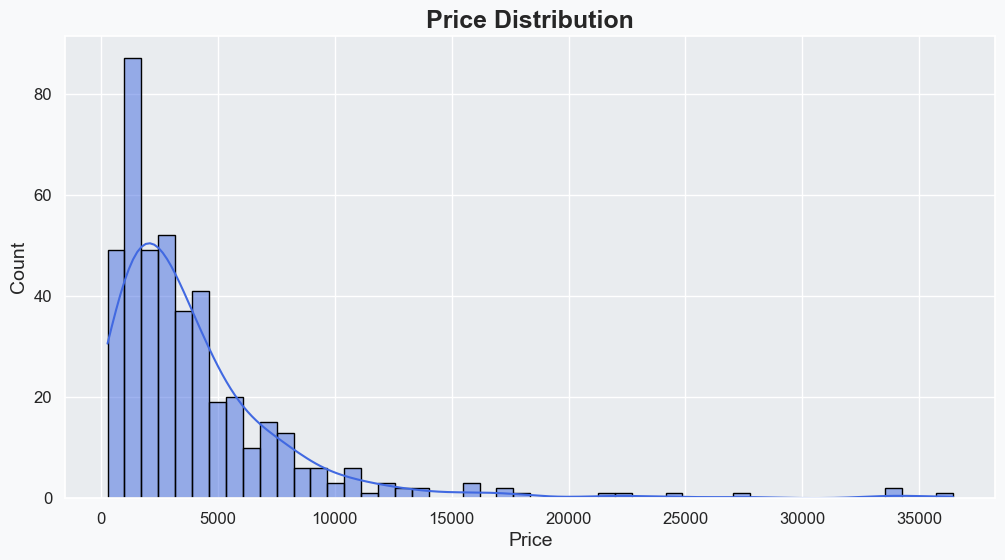

In [29]:
# Histogram and KDE for Price

sns.histplot(df1["Price"], bins=50, kde=True, color="royalblue", edgecolor="black")
plt.title("Price Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

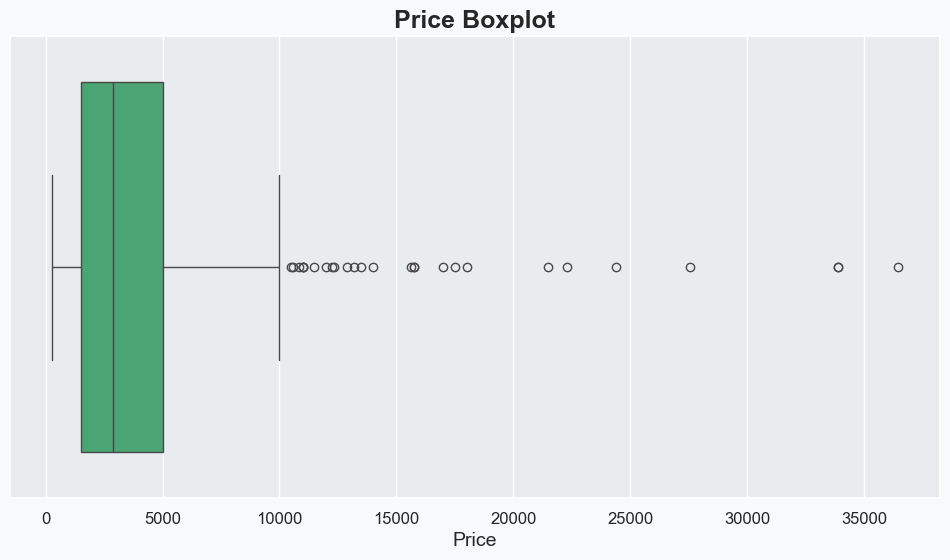

In [6]:
# Boxplot for Price
sns.boxplot(x=df1["Price"], color="mediumseagreen")
plt.title("Price Boxplot", fontsize=18, fontweight="bold")
plt.xlabel("Price")
plt.show()

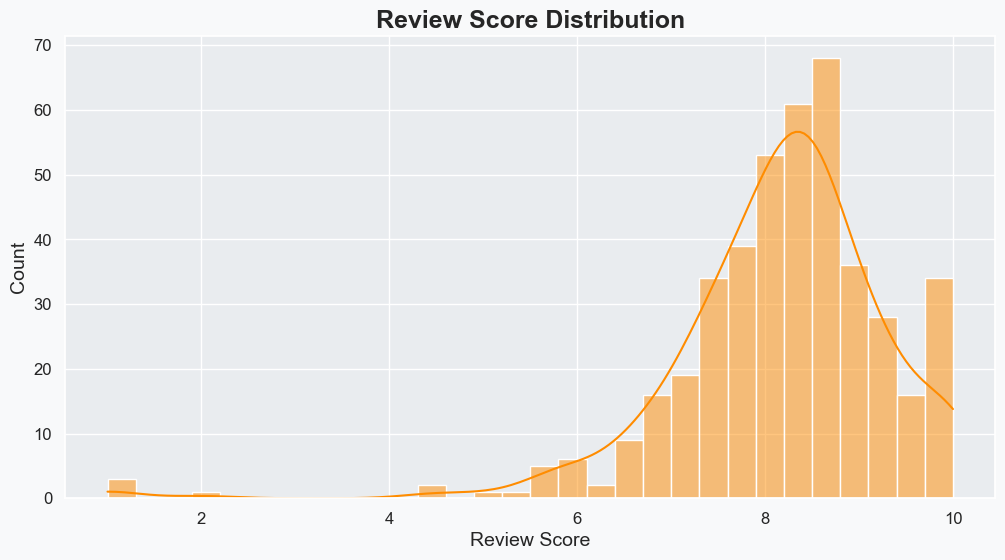

In [7]:
# Histogram and KDE for Review_score
sns.histplot(df1["Review_score"], bins=30, kde=True, color="darkorange", edgecolor="white")
plt.title("Review Score Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

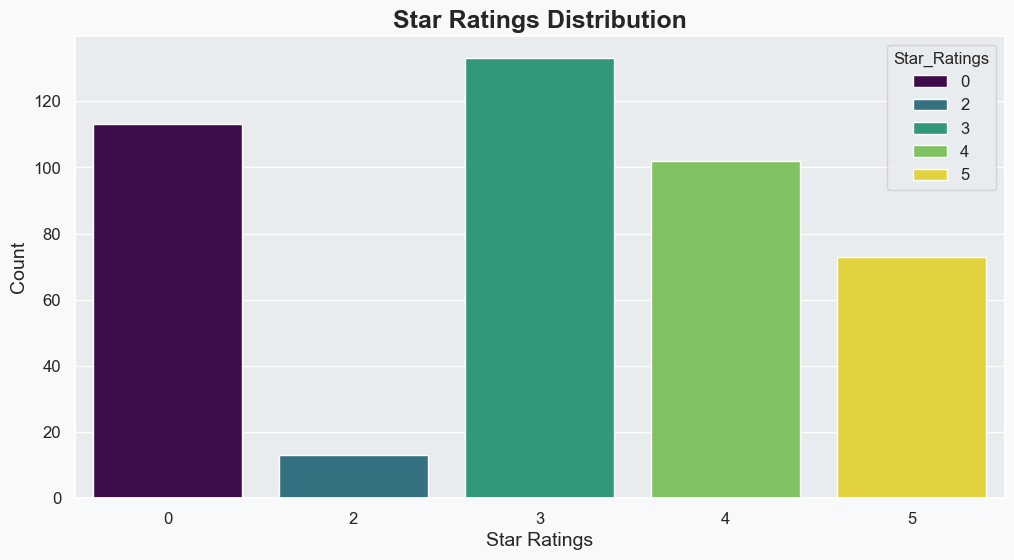

In [8]:
# Count plot for Star Ratings
sns.countplot(x="Star_Ratings", data=df1, hue="Star_Ratings", palette="viridis")
plt.title("Star Ratings Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Star Ratings")
plt.ylabel("Count")
plt.show()

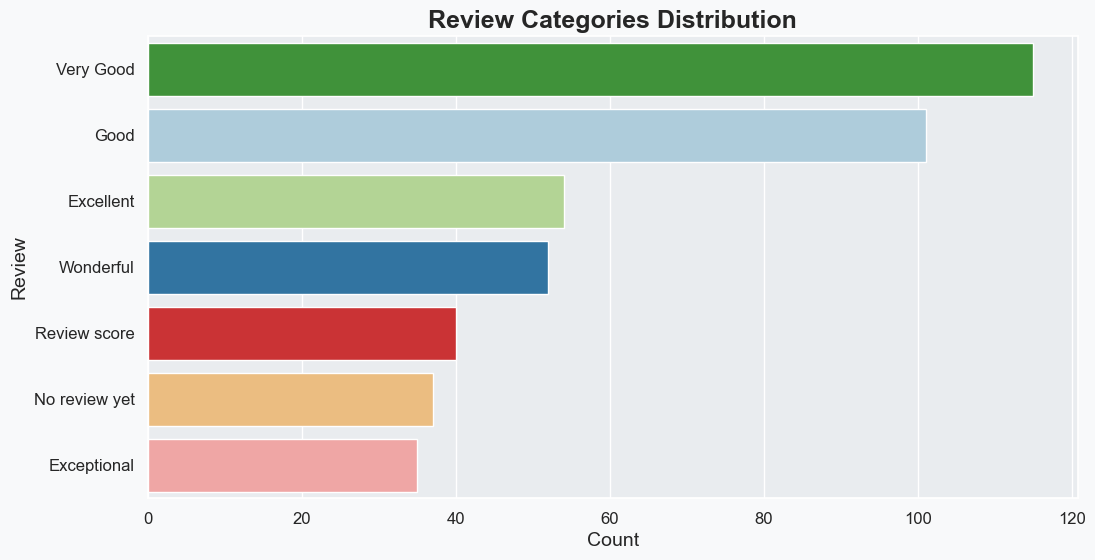

In [9]:
# Count plot for Review categories
sns.countplot(y="Review", data=df1, order=df1["Review"].value_counts().index,hue="Review", palette="Paired",legend=False)
plt.title("Review Categories Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Review")
plt.show()

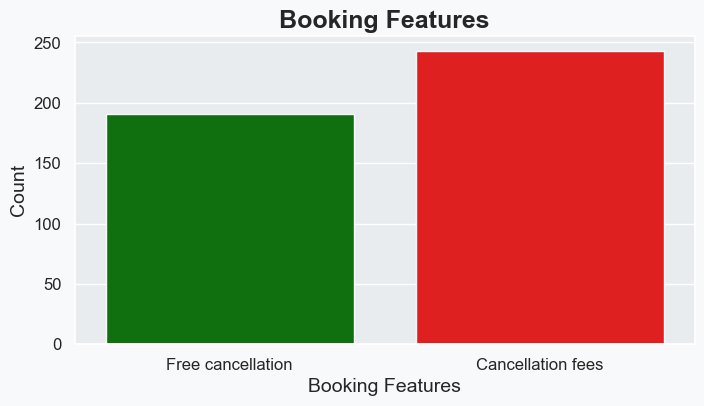

In [10]:
# Count plot for Booking Features
plt.rcParams["figure.figsize"] = (8,4)
sns.countplot(x="Booking_Features", data=df1,hue="Booking_Features", palette=["green", "red"])
plt.title("Booking Features", fontsize=18, fontweight="bold")
plt.xlabel("Booking Features")
plt.ylabel("Count")
plt.show()

## 3. Bivariate Analysis

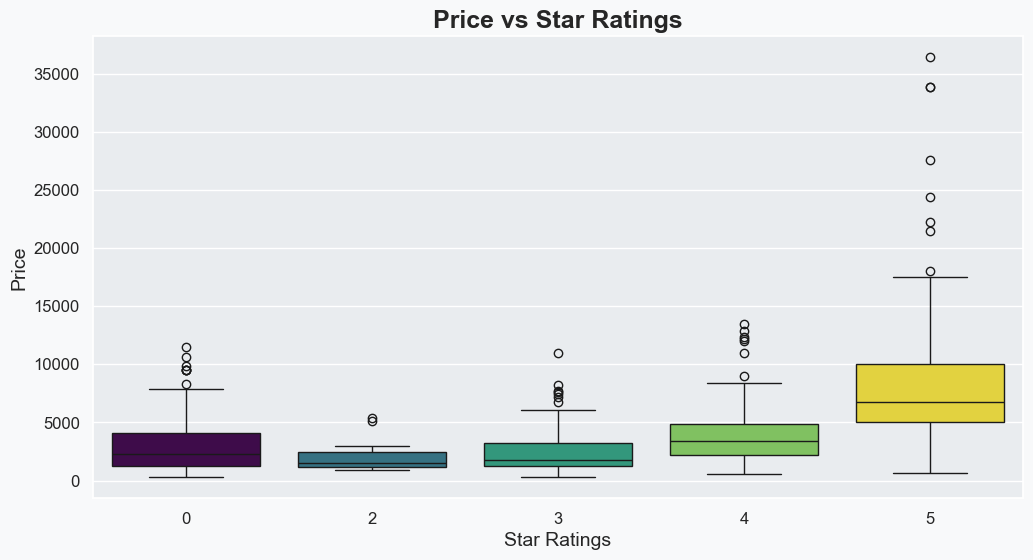

In [13]:
# Price vs Star Ratings
sns.boxplot(x="Star_Ratings", y="Price", data=df1,hue="Star_Ratings", palette="viridis",legend=False)
plt.title("Price vs Star Ratings", fontsize=18, fontweight="bold")
plt.xlabel("Star Ratings")
plt.ylabel("Price")
plt.show()

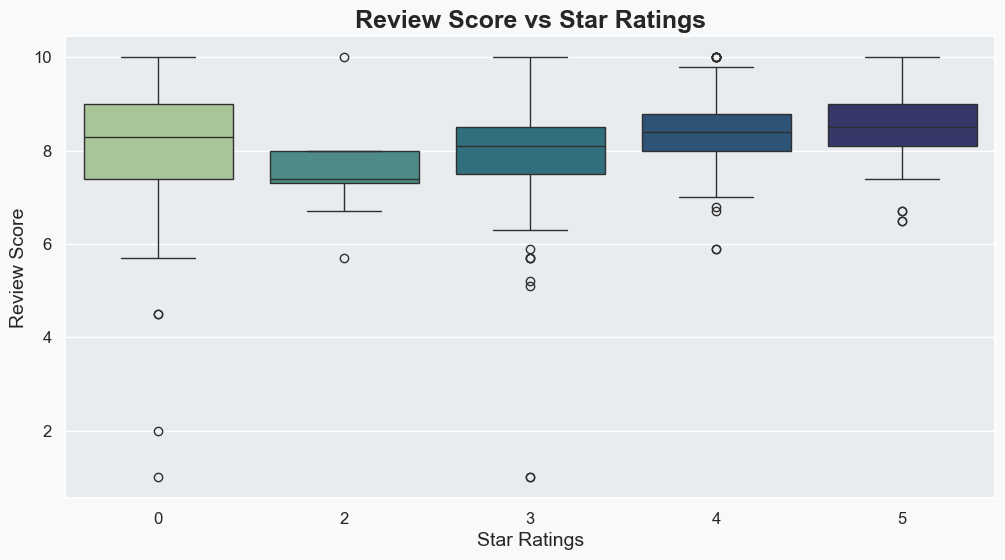

In [14]:
# Review Score vs Star Ratings
sns.boxplot(x="Star_Ratings", y="Review_score", data=df1,hue="Star_Ratings", palette="crest",legend=False)
plt.title("Review Score vs Star Ratings", fontsize=18, fontweight="bold")
plt.xlabel("Star Ratings")
plt.ylabel("Review Score")
plt.show()

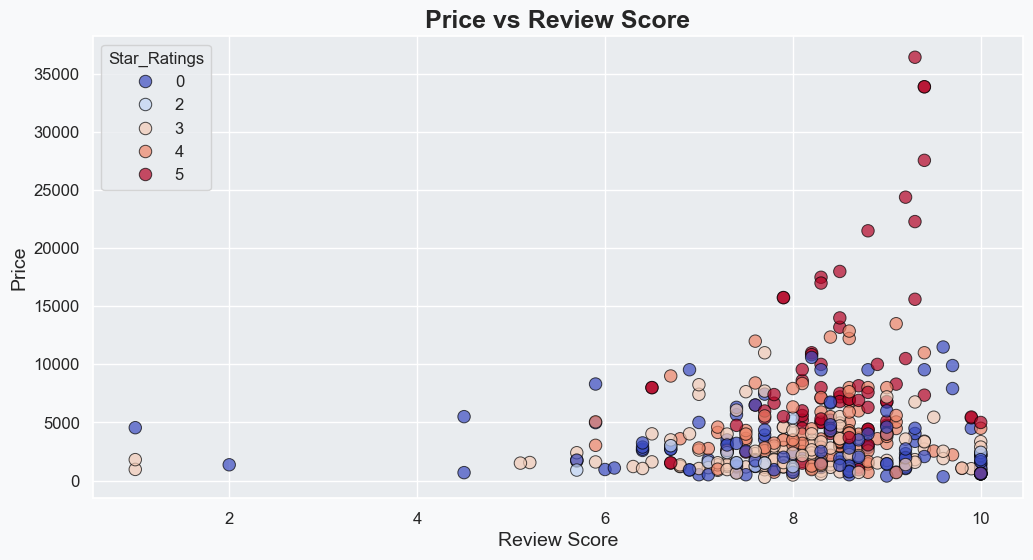

In [15]:
# Price vs Review Score (Scatter)
plt.rcParams["figure.figsize"] = (12,6)
sns.scatterplot(x="Review_score", y="Price", hue="Star_Ratings",data=df1, palette="coolwarm", alpha=0.7, s=80, edgecolor="black")
plt.title("Price vs Review Score", fontsize=18, fontweight="bold")
plt.xlabel("Review Score")
plt.ylabel("Price")
plt.show()

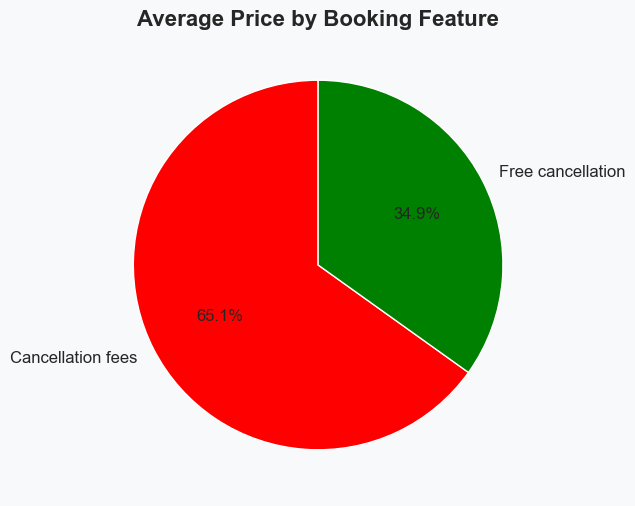

In [26]:
# Avg Price by Booking Feature - Pie Chart

avg_price_booking = df1.groupby("Booking_Features")["Price"].mean().reset_index()
plt.rcParams["figure.figsize"] = (6,6)
plt.pie(avg_price_booking["Price"],labels=avg_price_booking["Booking_Features"],autopct="%.1f%%",colors=["red","green"],startangle=90)
plt.title("Average Price by Booking Feature", fontsize=16, fontweight="bold")
plt.show()

## 4. Multivariate Analysis

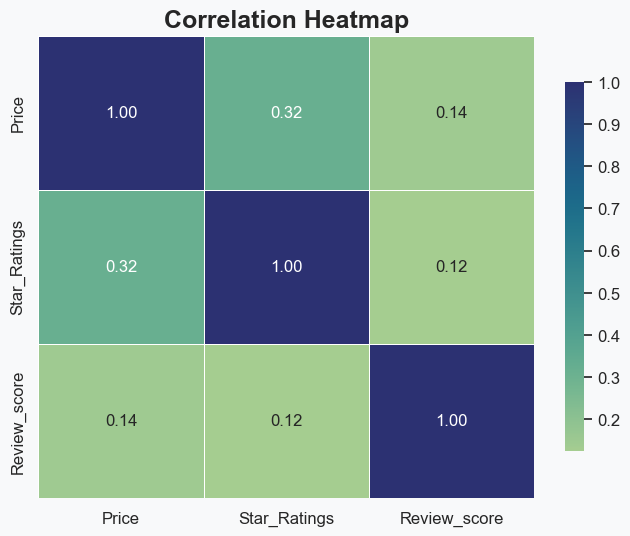

In [153]:
# Correlation Heatmap
plt.rcParams["figure.figsize"] = (8,6)
corr = df1[["Price","Star_Ratings","Review_score"]].corr()
sns.heatmap(corr, annot=True, cmap="crest", fmt=".2f", linewidths=0.5, cbar_kws={'shrink':0.8})
plt.title("Correlation Heatmap", fontsize=18, fontweight="bold")
plt.show()


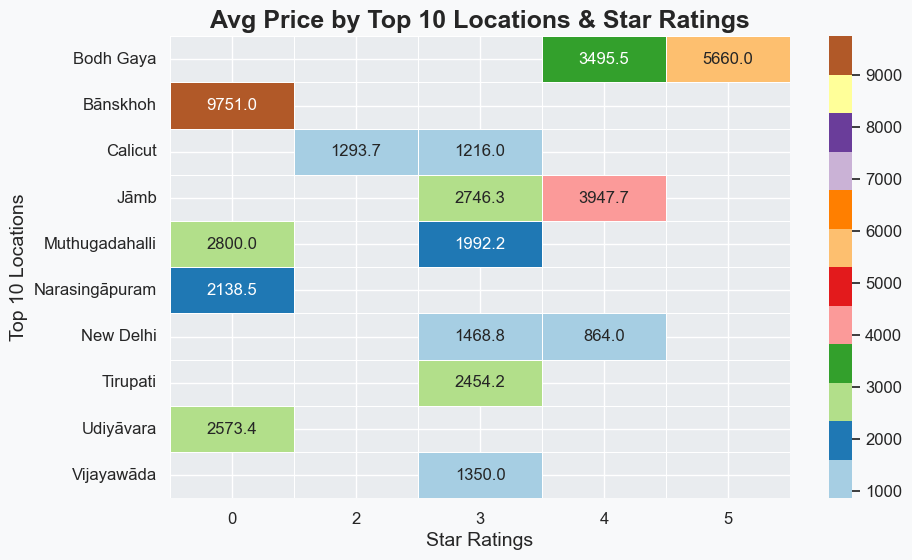

In [7]:
#  Top 10 Locations (by count of hotels)
top_locations = df1["Location"].value_counts().head(10).index

# Filter dataframe for top 10 locations
df_top10 = df1[df1["Location"].isin(top_locations)]

# Pivot table: Avg Price by Top 10 Locations & Star Ratings
pivot_table = df_top10.pivot_table(values="Price", index="Location", columns="Star_Ratings", aggfunc="mean")

# Heatmap
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pivot_table, cmap="Paired", linewidths=0.5, annot=True, fmt=".1f")
plt.title("Avg Price by Top 10 Locations & Star Ratings", fontsize=18, fontweight="bold")
plt.xlabel("Star Ratings")
plt.ylabel("Top 10 Locations")
plt.show()

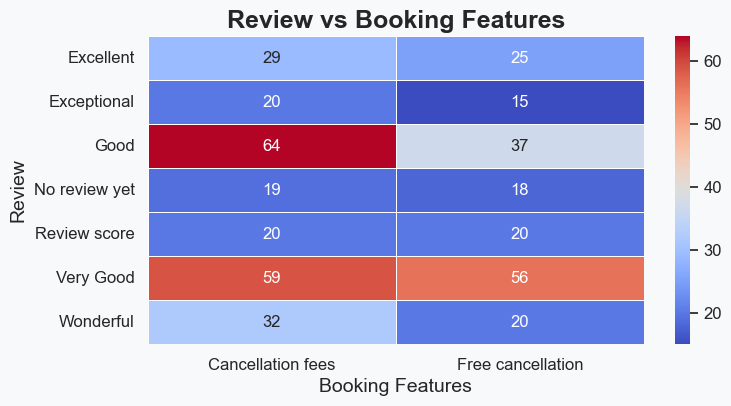

In [138]:
# Crosstab: Review vs Booking Features
review_booking = pd.crosstab(df1["Review"], df1["Booking_Features"])
sns.heatmap(review_booking, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Review vs Booking Features", fontsize=18, fontweight="bold")
plt.xlabel("Booking Features")
plt.ylabel("Review")
plt.show()

In [8]:
print("\n--- Quick Insights ---")
print("Average Price:", round(df1["Price"].mean(),2))
print("Most Common Review:", df1["Review"].mode()[0])
print("Highest Rated Hotels (by Review_score):")
print(df1.nlargest(5, "Review_score")[["Hotel_Name", "Location", "Price", "Star_Ratings", "Review_score"]])


--- Quick Insights ---
Average Price: 4117.31
Most Common Review: Very Good
Highest Rated Hotels (by Review_score):
                                            Hotel_Name     Location   Price  \
25                          Tripli Hotels Surya Villas    Jaisalmer   857.0   
42   Maclo Classic Luxury Resort- #Lavish & Luxury ...  McLeod Ganj  4500.0   
76                          Mistrinatku Hotel and stay        Sikti   719.0   
100                                     Hotel CJ Pride   Vijayawāda  1350.0   
101                           Coral Reef Malpe - Udupi    Udiyāvara  1455.0   

     Star_Ratings  Review_score  
25              3          10.0  
42              4          10.0  
76              4          10.0  
100             3          10.0  
101             0          10.0  
